In [1]:
%autosave 0

Autosave disabled


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from env import get_connection

In [3]:
query = '''
        SELECT sale_date, sale_amount,
        item_brand, item_name, item_price,
        store_address, store_zipcode,
        store_city, store_state
        FROM sales
        LEFT JOIN items USING(item_id)
        LEFT JOIN stores USING(store_id)
        '''

In [4]:
url = get_connection ('tsa_item_demand')

In [5]:
df = pd.read_sql(query,url)
df.head()

sale_date  sale_amount item_brand                       item_name  \
0  2013-01-01           13   Riceland  Riceland American Jazmine Rice   
1  2013-01-02           11   Riceland  Riceland American Jazmine Rice   
2  2013-01-03           14   Riceland  Riceland American Jazmine Rice   
3  2013-01-04           13   Riceland  Riceland American Jazmine Rice   
4  2013-01-05           10   Riceland  Riceland American Jazmine Rice   

   item_price           store_address store_zipcode   store_city store_state  
0        0.84  12125 Alamo Ranch Pkwy         78253  San Antonio          TX  
1        0.84  12125 Alamo Ranch Pkwy         78253  San Antonio          TX  
2        0.84  12125 Alamo Ranch Pkwy         78253  San Antonio          TX  
3        0.84  12125 Alamo Ranch Pkwy         78253  San Antonio          TX  
4        0.84  12125 Alamo Ranch Pkwy         78253  San Antonio          TX

In [6]:
df.shape

(913000, 9)

In [7]:
df.isna().sum()

sale_date        0
sale_amount      0
item_brand       0
item_name        0
item_price       0
store_address    0
store_zipcode    0
store_city       0
store_state      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_date      913000 non-null  object 
 1   sale_amount    913000 non-null  int64  
 2   item_brand     913000 non-null  object 
 3   item_name      913000 non-null  object 
 4   item_price     913000 non-null  float64
 5   store_address  913000 non-null  object 
 6   store_zipcode  913000 non-null  object 
 7   store_city     913000 non-null  object 
 8   store_state    913000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 62.7+ MB


### 1. Convert date column to datetime format

In [9]:
df.sale_date = pd.to_datetime(df.sale_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   sale_date      913000 non-null  datetime64[ns]
 1   sale_amount    913000 non-null  int64         
 2   item_brand     913000 non-null  object        
 3   item_name      913000 non-null  object        
 4   item_price     913000 non-null  float64       
 5   store_address  913000 non-null  object        
 6   store_zipcode  913000 non-null  object        
 7   store_city     913000 non-null  object        
 8   store_state    913000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 62.7+ MB


### 2. Plot the distribution of sales_amount and item_price


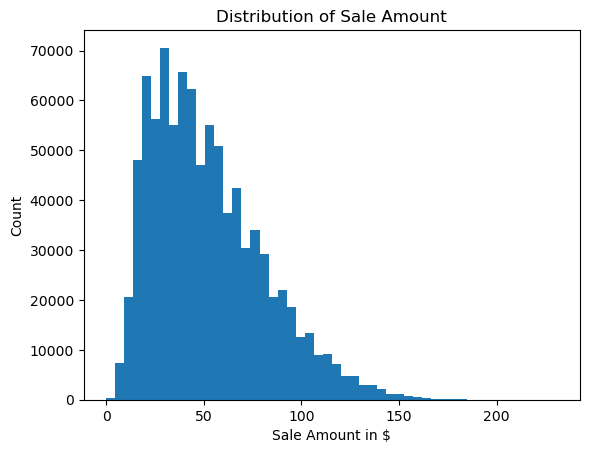

In [10]:
plt.hist(df.sale_amount, bins=50)
plt.xlabel('Sale Amount in $')
plt.ylabel('Count')
plt.title('Distribution of Sale Amount')
plt.show()

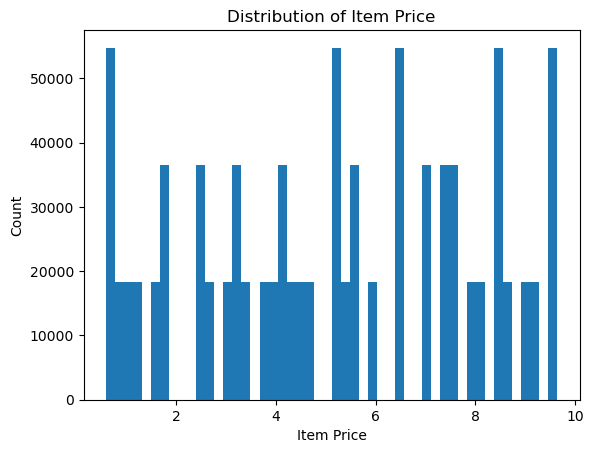

In [11]:
plt.hist(df.item_price, bins = 50)
plt.xlabel('Item Price')
plt.ylabel('Count')
plt.title('Distribution of Item Price')
plt.show()

### 3. Set the index to be the datetime variable

In [14]:
df = df.set_index('sale_date')


KeyError: "None of ['sale_date'] are in the columns"

In [15]:
df.head()

sale_amount item_brand                       item_name  \
sale_date                                                            
2013-01-01           13   Riceland  Riceland American Jazmine Rice   
2013-01-02           11   Riceland  Riceland American Jazmine Rice   
2013-01-03           14   Riceland  Riceland American Jazmine Rice   
2013-01-04           13   Riceland  Riceland American Jazmine Rice   
2013-01-05           10   Riceland  Riceland American Jazmine Rice   

            item_price           store_address store_zipcode   store_city  \
sale_date                                                                   
2013-01-01        0.84  12125 Alamo Ranch Pkwy         78253  San Antonio   
2013-01-02        0.84  12125 Alamo Ranch Pkwy         78253  San Antonio   
2013-01-03        0.84  12125 Alamo Ranch Pkwy         78253  San Antonio   
2013-01-04        0.84  12125 Alamo Ranch Pkwy         78253  San Antonio   
2013-01-05        0.84  12125 Alamo Ranch Pkwy         78253  San Antonio   

           store_state  
sale_date               
2013-01-01          TX  
2013-01-02          TX  
2013-01-03          TX  
2013-01-04          TX  
2013-01-05          TX

In [16]:
df.sort_values('sale_date')
df.head()

sale_amount item_brand                       item_name  \
sale_date                                                            
2013-01-01           13   Riceland  Riceland American Jazmine Rice   
2013-01-02           11   Riceland  Riceland American Jazmine Rice   
2013-01-03           14   Riceland  Riceland American Jazmine Rice   
2013-01-04           13   Riceland  Riceland American Jazmine Rice   
2013-01-05           10   Riceland  Riceland American Jazmine Rice   

            item_price           store_address store_zipcode   store_city  \
sale_date                                                                   
2013-01-01        0.84  12125 Alamo Ranch Pkwy         78253  San Antonio   
2013-01-02        0.84  12125 Alamo Ranch Pkwy         78253  San Antonio   
2013-01-03        0.84  12125 Alamo Ranch Pkwy         78253  San Antonio   
2013-01-04        0.84  12125 Alamo Ranch Pkwy         78253  San Antonio   
2013-01-05        0.84  12125 Alamo Ranch Pkwy         78253  San Antonio   

           store_state  
sale_date               
2013-01-01          TX  
2013-01-02          TX  
2013-01-03          TX  
2013-01-04          TX  
2013-01-05          TX

### 4. Add a 'month' and 'day of week' column to your dataframe

In [17]:
df['month'] = df.index.month_name()
df.head()

sale_amount item_brand                       item_name  \
sale_date                                                            
2013-01-01           13   Riceland  Riceland American Jazmine Rice   
2013-01-02           11   Riceland  Riceland American Jazmine Rice   
2013-01-03           14   Riceland  Riceland American Jazmine Rice   
2013-01-04           13   Riceland  Riceland American Jazmine Rice   
2013-01-05           10   Riceland  Riceland American Jazmine Rice   

            item_price           store_address store_zipcode   store_city  \
sale_date                                                                   
2013-01-01        0.84  12125 Alamo Ranch Pkwy         78253  San Antonio   
2013-01-02        0.84  12125 Alamo Ranch Pkwy         78253  San Antonio   
2013-01-03        0.84  12125 Alamo Ranch Pkwy         78253  San Antonio   
2013-01-04        0.84  12125 Alamo Ranch Pkwy         78253  San Antonio   
2013-01-05        0.84  12125 Alamo Ranch Pkwy         78253  San Antonio   

           store_state    month  
sale_date                        
2013-01-01          TX  January  
2013-01-02          TX  January  
2013-01-03          TX  January  
2013-01-04          TX  January  
2013-01-05          TX  January

### 5. Add a column to your df, sales_total, which is a derived from sales_amount(total items)and item_price

In [18]:
df['sales_total'] = df.sale_amount * df.item_price
df.head()

sale_amount item_brand                       item_name  \
sale_date                                                            
2013-01-01           13   Riceland  Riceland American Jazmine Rice   
2013-01-02           11   Riceland  Riceland American Jazmine Rice   
2013-01-03           14   Riceland  Riceland American Jazmine Rice   
2013-01-04           13   Riceland  Riceland American Jazmine Rice   
2013-01-05           10   Riceland  Riceland American Jazmine Rice   

            item_price           store_address store_zipcode   store_city  \
sale_date                                                                   
2013-01-01        0.84  12125 Alamo Ranch Pkwy         78253  San Antonio   
2013-01-02        0.84  12125 Alamo Ranch Pkwy         78253  San Antonio   
2013-01-03        0.84  12125 Alamo Ranch Pkwy         78253  San Antonio   
2013-01-04        0.84  12125 Alamo Ranch Pkwy         78253  San Antonio   
2013-01-05        0.84  12125 Alamo Ranch Pkwy         78253  San Antonio   

           store_state    month  sales_total  
sale_date                                     
2013-01-01          TX  January        10.92  
2013-01-02          TX  January         9.24  
2013-01-03          TX  January        11.76  
2013-01-04          TX  January        10.92  
2013-01-05          TX  January         8.40

### 6. put all in function. 

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

def acquiring():
    query = '''
        SELECT sale_date, sale_amount,
        item_brand, item_name, item_price,
        store_address, store_zipcode,
        store_city, store_state
        FROM sales
        LEFT JOIN items USING(item_id)
        LEFT JOIN stores USING(store_id)
        '''
    url = get_connection('tsa_item_demand')
    df = pd.read_sql(query, url)
    return df

def datetime_prep(df):
    # Convert date column to datetime format
    df.sale_date = pd.to_datetime(df.sale_date)
    # Set index to datetime variable
    df = df.set_index('sale_date')
    # Sort values by sale_date
    df = df.sort_values('sale_date')
    # Add month and day of week column to df
    df['month'] = df.index.month_name()
    df['day_of_week'] = df.index.day_name()
    # Add column to df, sales_total
    df['sales_total'] = df.sale_amount * df.item_price
    return df

def plotting(df):
    # Plot distribution of sale_amount and item_price
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(df.sale_amount, bins=50)
    plt.xlabel('Sale Amount in $')
    plt.ylabel('Count')
    plt.title('Distribution of Sale Amount')
    
    plt.subplot(1, 2, 2)
    plt.hist(df.item_price, bins=50)
    plt.xlabel('Item Price')
    plt.ylabel('Count')
    plt.title('Distribution of Item Price')
    
    plt.tight_layout()
    plt.show()

# Example usage:
df = acquiring()
df = datetime_prep(df)
plotting(df)
